In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install -q xlrd

In [0]:
df = pd.read_excel (r'/content/drive/My Drive/Data/Smartbox/Analytics_test_Smartbox.xlsx', sep = '')

## Understanding Data

In [5]:
df.head()

,Date,Product Name,Daily Forecast,Daily Sales
0,2017-01-01,Product A,39000,40608.0
1,2017-01-02,Product A,91000,95839.2
2,2017-01-03,Product A,106000,104976.0
3,2017-01-04,Product A,113000,120771.0
4,2017-01-05,Product A,135000,141102.0


Checking for NaN

In [6]:
df.isnull().sum()

Date              0
Product Name      0
Daily Forecast    0
Daily Sales       0
dtype: int64

Renaming the column names by eliminating spaces or specia characters

In [7]:
import re
print("columns", df.columns)


def clean_col(col):
  """Clean a string.

  In our case, the column names of the dataframe. We remove all the characters 
  that are not a digit (0-9) nor a letter (a-z) not capital letter (A-Z) and 
  and replace them by a underscore _
  @params col : string - string to clean
  """
  return re.sub(r"[^0-9a-zA-Z]+", "_", col.rstrip()).lower()


df.columns = [clean_col(col) for col in df.columns]
print("after renaming", df.columns)


columns Index(['Date', 'Product Name', 'Daily Forecast', 'Daily Sales'], dtype='object')
after renaming Index(['date', 'product_name', 'daily_forecast', 'daily_sales'], dtype='object')


Checking for uniques product names

In [8]:
df['product_name'].unique()

array(['Product A', 'Product B', 'Product C', 'Product D', 'Product E',
       'Product F', 'Product G'], dtype=object)

Since this dataset deals with date column there is a possibiity to add new columns such as 
"month", "year", "day of a week"

In [0]:
import datetime as dt
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.weekday_name
df['year'] = df['date'].dt.year

In [10]:
df.head()

,date,product_name,daily_forecast,daily_sales,month,day,year
0,2017-01-01,Product A,39000,40608.0,1,Sunday,2017
1,2017-01-02,Product A,91000,95839.2,1,Monday,2017
2,2017-01-03,Product A,106000,104976.0,1,Tuesday,2017
3,2017-01-04,Product A,113000,120771.0,1,Wednesday,2017
4,2017-01-05,Product A,135000,141102.0,1,Thursday,2017


### Checking the "RMSE" of "daily_forecast" and "daily_sales"

In [11]:
from sklearn import metrics
print ("RMSE on the daily sales is :", np.sqrt(metrics.mean_squared_error (df['daily_sales'], df['daily_forecast'])))
print ("MAE on the daily sales is:", metrics.mean_absolute_error (df['daily_sales'], df['daily_forecast']))

RMSE on the daily sales is : 3495681.272966552
MAE on the daily sales is: 147377.86544397642


The prediction and the actual sales price metrics is not so good, so checking the predictions seperately for each product .

##Creating a dataframe for each product

Checking the number of entries for each product

In [12]:
for product in df['product_name'].unique():
  print ( "The number of entries for the {} is {} " . format ( product ,df[df['product_name'] == product].shape[0]))

The number of entries for the Product A is 710 
The number of entries for the Product B is 303 
The number of entries for the Product C is 345 
The number of entries for the Product D is 710 
The number of entries for the Product E is 710 
The number of entries for the Product F is 710 
The number of entries for the Product G is 73 


##### Creating a dataframe for each product

In [0]:
df_product_A = pd.DataFrame()
df_product_B = pd.DataFrame()
df_product_C = pd.DataFrame()
df_product_D = pd.DataFrame()
df_product_E = pd.DataFrame()
df_product_F = pd.DataFrame()
df_product_G = pd.DataFrame()
df_product_A = df[df['product_name'] == 'Product A'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_B = df[df['product_name'] == 'Product B'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_C = df[df['product_name'] == 'Product C'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_D = df[df['product_name'] == 'Product D'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_E = df[df['product_name'] == 'Product E'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_F = df[df['product_name'] == 'Product F'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]
df_product_G = df[df['product_name'] == 'Product G'][['date' ,'daily_forecast', 'daily_sales', 'month', 'year', 'day', 'product_name']]

### Checking for the Outliers

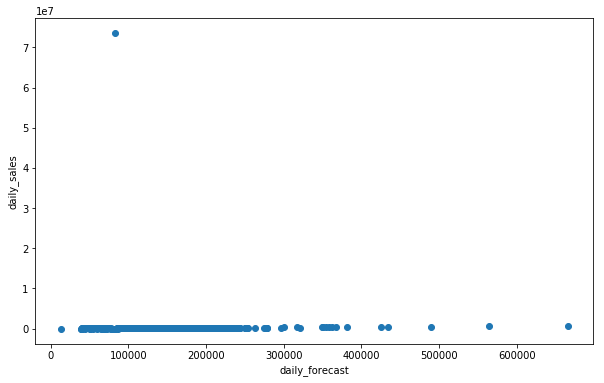

In [15]:
fig, ax = plt.subplots(figsize = (10,6))
ax.scatter (df_product_A['daily_forecast'], df_product_A['daily_sales'] )
plt.xlabel ('daily_forecast')
plt.ylabel ('daily_sales')
plt.show()


From the above graph it seems like there are outliers.

### Removing outliers with zscore

In [0]:
#Creating function that calculates zscore
def outliers_modified_z_score(ys):
    #threshold = 3.5

    median_y = np.median(ys)
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y
                         for y in ys]
    return  np.abs(modified_z_scores)
  
# Applying ZSCORE analysis on "daily_forecast" and "daily_sales" columns for each
# product seperately

cols = list(['daily_forecast', 'daily_sales'])
for col in cols:
   col_zscore = col +'_zscore'
   df_product_A[col_zscore] = outliers_modified_z_score(df_product_A[col])
   df_product_B[col_zscore] = outliers_modified_z_score(df_product_B[col])
   df_product_C[col_zscore] = outliers_modified_z_score(df_product_C[col])
   df_product_D[col_zscore] = outliers_modified_z_score(df_product_D[col])
   df_product_E[col_zscore] = outliers_modified_z_score(df_product_E[col])
   df_product_F[col_zscore] = outliers_modified_z_score(df_product_F[col])
   df_product_G[col_zscore] = outliers_modified_z_score(df_product_G[col])
   

#####Now we have a dataframe for each product consisting of all columns and also Zscore

To remove the outliers,  the approach was to select the vaues that has zscore less than 3

I can improve in the outlier detection but I will do it in the end if I have time

In [0]:
df_product_A = df_product_A [(df_product_A['daily_forecast_zscore'] < 3) & (df_product_A['daily_sales_zscore'] < 3)]
df_product_B = df_product_B [(df_product_B['daily_forecast_zscore'] < 3) & (df_product_B['daily_sales_zscore'] < 3)]
df_product_C = df_product_C [(df_product_C['daily_forecast_zscore'] < 3) & (df_product_C['daily_sales_zscore'] < 3)]
df_product_D = df_product_D [(df_product_D['daily_forecast_zscore'] < 3) & (df_product_D['daily_sales_zscore'] < 3)]
df_product_E = df_product_E [(df_product_E['daily_forecast_zscore'] < 3) & (df_product_E['daily_sales_zscore'] < 3)]
df_product_F = df_product_F [(df_product_F['daily_forecast_zscore'] < 3) & (df_product_F['daily_sales_zscore'] < 3)]
df_product_G = df_product_G [(df_product_G['daily_forecast_zscore'] < 3) & (df_product_G['daily_sales_zscore'] < 3)]


### New datasets by removing outliers are created

Plotting the daily forecast against daily sales, to see how well the forecast matches with the sale.

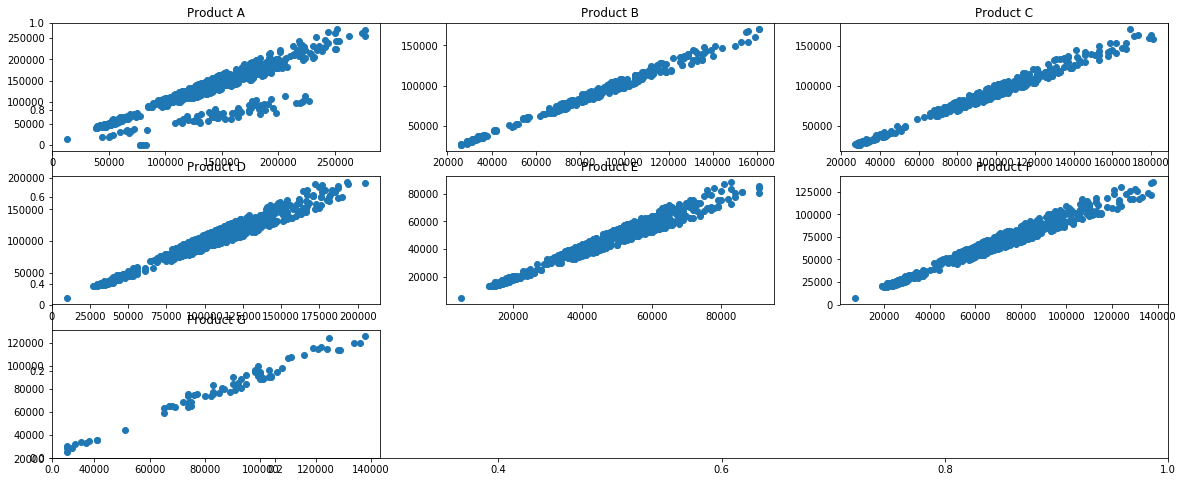

In [18]:
fig,ax = plt.subplots (figsize = (20,8))
ax = fig.add_subplot (3,3,1)
ax = plt.scatter (df_product_A['daily_forecast'], df_product_A['daily_sales'])
plt.title ('Product A')

ax = fig.add_subplot (3,3,2)
ax = plt.scatter (df_product_B['daily_forecast'], df_product_B['daily_sales'])
plt.title ('Product B')

ax = fig.add_subplot (3,3,3)
ax = plt.scatter (df_product_C['daily_forecast'], df_product_C['daily_sales'])
plt.title ('Product C')

ax = fig.add_subplot (3,3,4)
ax = plt.scatter (df_product_D['daily_forecast'], df_product_D['daily_sales'])
plt.title ('Product D')

ax = fig.add_subplot (3,3,5)
ax = plt.scatter (df_product_E['daily_forecast'], df_product_E['daily_sales'])
plt.title ('Product E')

ax = fig.add_subplot (3,3,6)
ax = plt.scatter (df_product_F['daily_forecast'], df_product_F['daily_sales'])
plt.title ('Product F')

ax = fig.add_subplot (3,3,7)
ax = plt.scatter (df_product_G['daily_forecast'], df_product_G['daily_sales'])
plt.title ('Product G')

plt.show()

### Calculating "RMSE" and "MAE" for columns "daily_forecast" and "daily_sales" for indicidua product

In [0]:
metrics_rmse = []
metrics_mae = []
product_names = []
dataframes = [df_product_A, df_product_B, df_product_C, df_product_D, df_product_E, df_product_F, df_product_G]

for dataframe in dataframes:
  metrics_rmse.append (np.sqrt (metrics.mean_squared_error(dataframe['daily_sales'], dataframe['daily_forecast'])))
  metrics_mae.append (metrics.mean_absolute_error (dataframe['daily_sales'], dataframe['daily_forecast']))
  product_names.append (dataframe['product_name'].unique().max())
  


In [20]:
df_metrics = pd.DataFrame ({'product_name' : product_names,
                           'metrics_rmse' : metrics_rmse, 
                           'metrics_mae' : metrics_mae})

df_metrics

,product_name,metrics_rmse,metrics_mae
0,Product A,28280.853271,14836.955226
1,Product B,4921.158771,3704.111034
2,Product C,8432.657150,6805.940295
3,Product D,7564.561802,5715.669181
4,Product E,3352.777606,2523.198062
5,Product F,4929.999225,3650.317247
6,Product G,7706.217138,6383.187500


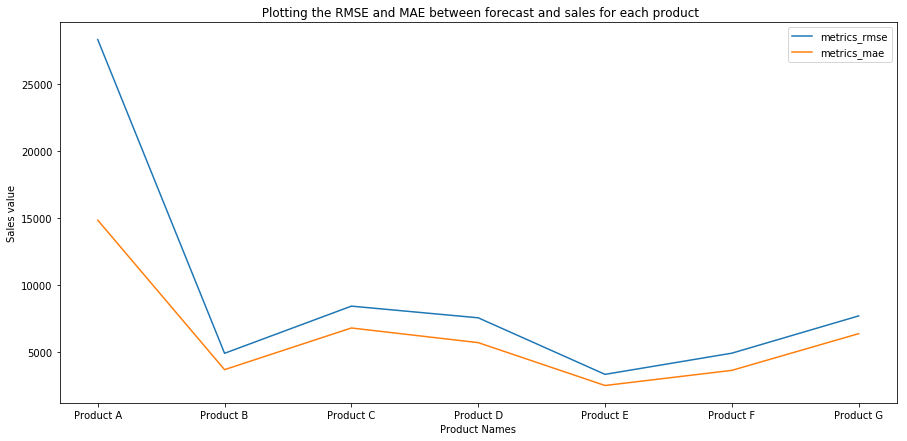

In [22]:
fig, ax = plt.subplots (figsize = (15,7))

ax = plt.plot (df_metrics['product_name'],df_metrics['metrics_rmse'] )
ax = plt.plot (df_metrics['product_name'],df_metrics['metrics_mae'] )
plt.xlabel ('Product Names')
plt.ylabel ('Sales value')
plt.title (' Plotting the RMSE and MAE between forecast and sales for each product')
plt.legend()
plt.show()

#### Concatinating all the products into single dataframe

In [0]:
df_concat = pd.concat ([df_product_A, df_product_B, df_product_C, df_product_D, df_product_E, df_product_F, df_product_G])

### Exporting the concatinated file without outliers into the excel

In [0]:
df_concat.to_csv (r'/content/drive/My Drive/Data/Smartbox/Smartbox_Outliers_Removed.csv')

#### Mostly sold porduct

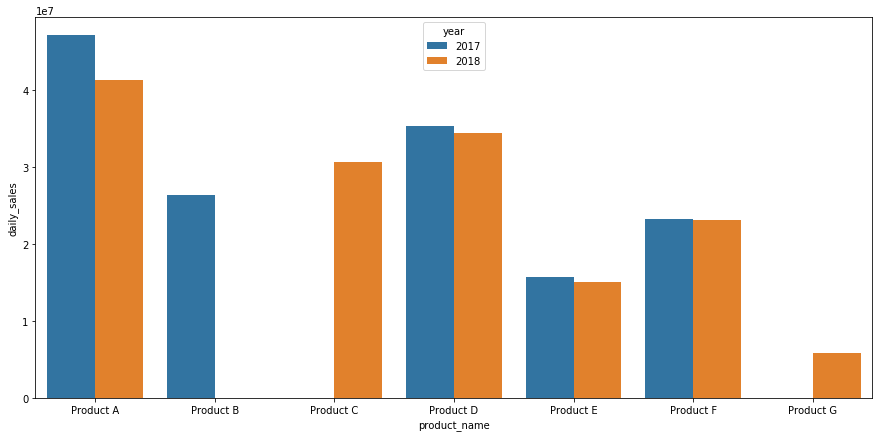

In [25]:
groubby_mostly_sold_year = df_concat.groupby (['product_name', 'year'])['daily_sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.barplot ( x= 'product_name' , y = 'daily_sales' , hue = 'year',  data = groubby_mostly_sold_year, ax = ax )
plt.show()


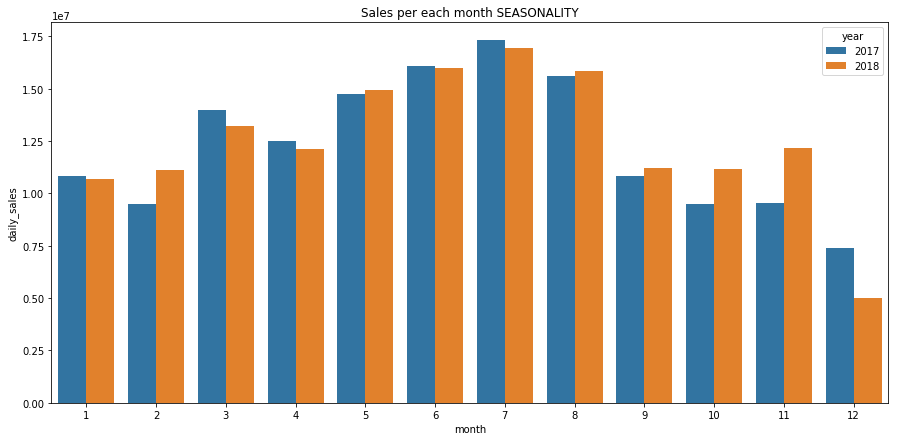

In [26]:
groubby_mostly_sold_month = df_concat.groupby (['year', 'month'])['daily_sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.barplot ( x= 'month' , y = 'daily_sales' , hue = 'year',  data = groubby_mostly_sold_month, ax = ax )
plt.title ('Sales per each month SEASONALITY')
plt.show()

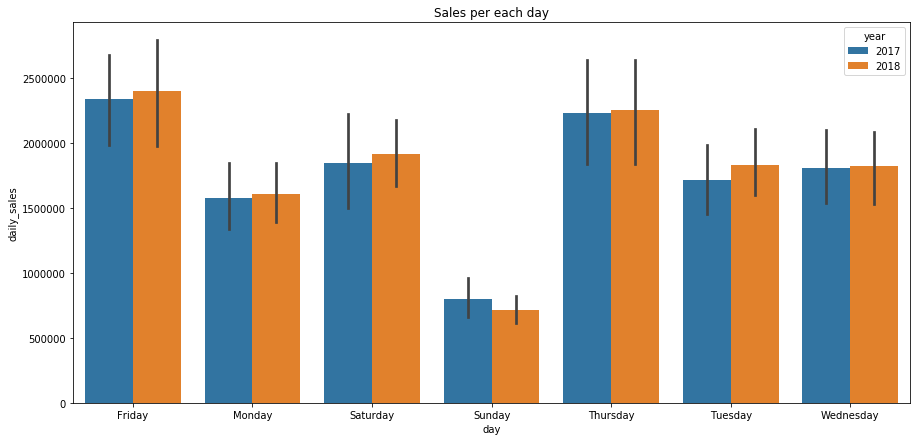

In [27]:
groubby_mostly_sold_day = df_concat.groupby (['year', 'month', 'day'])['daily_sales'].sum().reset_index()
fig, ax = plt.subplots(figsize=(15,7))

ax = sns.barplot ( x= 'day' , y = 'daily_sales' , hue = 'year',  data = groubby_mostly_sold_day, ax = ax )
plt.title ('Sales per each day')
plt.show()

##### Resampling and rolling window

In [0]:
df_product_A1 = df_product_A.set_index ('date')
df_product_B1 = df_product_B.set_index ('date')
df_product_C1 = df_product_C.set_index ('date')
df_product_D1 = df_product_D.set_index ('date')
df_product_E1 = df_product_E.set_index ('date')
df_product_F1 = df_product_F.set_index ('date')
df_product_G1 = df_product_G.set_index ('date')


In [0]:
df_all_product_sales = pd.DataFrame()
df_all_product_sales = pd.concat ([df_product_A1[['daily_sales']],df_product_B1[['daily_sales']],df_product_C1[['daily_sales']], df_product_D1[['daily_sales']], 
                                  df_product_E1[['daily_sales']], df_product_F1[['daily_sales']], df_product_G1[['daily_sales']]], axis = 1, join='outer')

df_all_product_sales.columns = ['daily_sales_A', 'daily_sales_B','daily_sales_C','daily_sales_D','daily_sales_E','daily_sales_F','daily_sales_G']


####Calculating rolling statstics for all the products

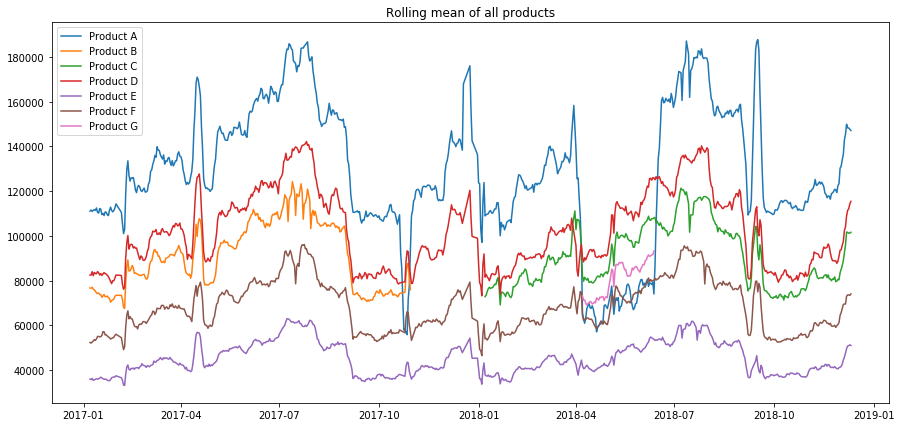

In [32]:
fig,ax = plt.subplots (figsize = (15,7))
rolmeanA = df_product_A1['daily_sales'].rolling (7).mean()
rolmeanB = df_product_B1['daily_sales'].rolling (7).mean()
rolmeanC = df_product_C1['daily_sales'].rolling (7).mean()
rolmeanD = df_product_D1['daily_sales'].rolling (7).mean()
rolmeanE = df_product_E1['daily_sales'].rolling (7).mean()
rolmeanF = df_product_F1['daily_sales'].rolling (7).mean()
rolmeanG = df_product_G1['daily_sales'].rolling (7).mean()
plt.plot (rolmeanA, label = 'Product A')
plt.plot (rolmeanB, label = 'Product B')
plt.plot (rolmeanC, label = 'Product C')
plt.plot (rolmeanD, label = 'Product D')
plt.plot (rolmeanE, label = 'Product E')
plt.plot (rolmeanF, label = 'Product F')
plt.plot (rolmeanG, label = 'Product G')
plt.legend()
plt.title ('Rolling mean of all products')
plt.show()